# Movielens Ratings Prediction Project  
# Feature Engineering, Exploratory Data Analysis, Data Balancing,
# Classifier Models - Gaussian Naive Bayes, KNeighbors, 
# Stochastic Gradient Descent, Decision Tree, Random Forest
# and Deep Neural Network

# Note: As input features are all having only binary data, none of the 
# models came up with reasonable accuracy except Decision Tree and
# Random Forest which use tree based algorithms.

In [1]:
##############################################################################################################
# import the required python libraries
##############################################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
import warnings
warnings.filterwarnings('ignore')

In [2]:
##############################################################################################################
# read the input movies .dat file
##############################################################################################################
movies = pd.read_csv('./datasets/movies.dat',header=None, sep='::', names=('MovieID','Title','Genres'),index_col=None,engine='python',\
                    encoding='latin-1')

In [3]:
##############################################################################################################
# look at the first 5 reocrds of the read file to make sure they are read properly
##############################################################################################################
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
##############################################################################################################
# read the users file
##############################################################################################################
users = pd.read_csv('./datasets/users.dat',header=None,sep='::',names=('UserID','Gender','Age','Occupation','Zip-code'),\
                    encoding='latin-1',engine='python')

In [5]:
##############################################################################################################
# look at the top 5 records of the users file
##############################################################################################################
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
##############################################################################################################
# read the Ratings input file
##############################################################################################################
ratings = pd.read_csv('./datasets/ratings.dat',header=None,sep='::',names=('UserID','MovieID','Rating','Timestamp'),\
                      encoding='latin-1',engine='python')

In [7]:
##############################################################################################################
# look at the first 5 records to make sure everything is ok with the file
##############################################################################################################
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
##############################################################################################################
# look the structure of the movies file to make sure there are no null values and find out row,column #'s
##############################################################################################################
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [9]:
##############################################################################################################
# look at the structure of the users file to make sure there are no null values, and find out row,column #'s
##############################################################################################################
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [10]:
##############################################################################################################
# look at the structure of the ratings file for null values, and to find row,column #'s
##############################################################################################################
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


### No null values in all three files - data looks good

In [11]:
##############################################################################################################
# merge the ratings and users file on movieID
##############################################################################################################
ratings_movies = pd.merge(ratings,movies,how='inner',on='MovieID')

In [12]:
##############################################################################################################
# Look at the first 5 records of the merged file to make sure everything is ok
##############################################################################################################
ratings_movies.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


In [13]:
##############################################################################################################
# now merge the ratings and users file on UserID column
##############################################################################################################
ratings_users = pd.merge(ratings,users,how='inner',on='UserID')

In [14]:
##############################################################################################################
# look at the first 5 reocrds to make sure everything is ok with the file
##############################################################################################################
ratings_users.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [15]:
##############################################################################################################
# mow merge the bove 2 merged files- ratings_users and ratings_movies file as a Master data file
##############################################################################################################
Master_Data = pd.merge(ratings_users,ratings_movies,how='inner')

In [16]:
##############################################################################################################
# look at the first 5 and the bottom 5 records of the master data file for accuracy
##############################################################################################################
Master_Data.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


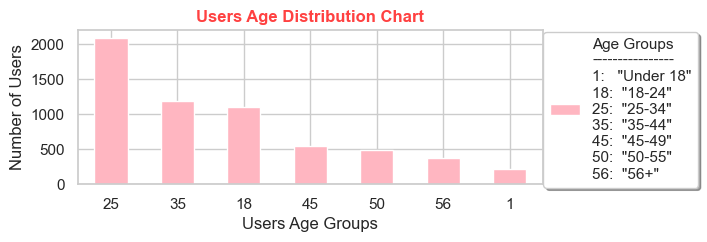

In [17]:
##############################################################################################################
# plot the graph of the Age distribution of the users
##############################################################################################################
users.Age.value_counts().plot(kind='bar',figsize=(6,2), color='lightpink',\
label=('Age Groups''\n' 
       '----------------' '\n'
       '1:   "Under 18"''\n'
       '18:  "18-24"''\n'
       '25:  "25-34"''\n'
       '35:  "35-44"''\n'
       '45:  "45-49"''\n'
       '50:  "50-55"''\n'
       '56:  "56+"'))


plt.title('Users Age Distribution Chart',color='#ff1111',fontweight='bold',alpha=.8)
plt.xlabel('Users Age Groups')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(0.85, 0.54, 0.5, 0.5),shadow=True)
plt.show()

# 25-34 age group provided most ratings and 
# 'Under 18' group provided least ratings for all movies 

In [18]:
##############################################################################################################
# find the movieID of the Toy story (1995) movie
##############################################################################################################
Master_Data_sub = Master_Data[Master_Data['Title'].str.contains('Toy Story \(')]

In [19]:
##############################################################################################################
# look at the top 5 records to get the movieID
##############################################################################################################
Master_Data_sub.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
40,1,1,5,978824268,F,1,10,48067,Toy Story (1995),Animation|Children's|Comedy
469,6,1,4,978237008,F,50,9,55117,Toy Story (1995),Animation|Children's|Comedy
581,8,1,4,978233496,M,25,12,11413,Toy Story (1995),Animation|Children's|Comedy
711,9,1,5,978225952,M,25,17,61614,Toy Story (1995),Animation|Children's|Comedy
837,10,1,5,978226474,F,35,1,95370,Toy Story (1995),Animation|Children's|Comedy


In [20]:
##############################################################################################################
# now extract the Toy Story (1995) movie details to analyze
##############################################################################################################
Master_Data_toystory =  Master_Data_sub[Master_Data_sub['MovieID']==1]

In [21]:
##############################################################################################################
# look at the top 5 and bottom 5 records to make sure they are correct
##############################################################################################################
Master_Data_toystory.count()

UserID        2077
MovieID       2077
Rating        2077
Timestamp     2077
Gender        2077
Age           2077
Occupation    2077
Zip-code      2077
Title         2077
Genres        2077
dtype: int64

# 2077 users provided ratings for Toy Story movie

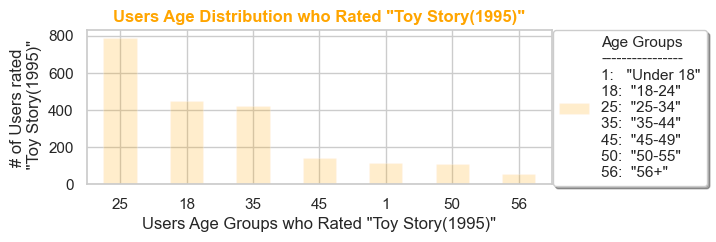

In [22]:
##############################################################################################################
# plot the graph of the age distribution of the users who rated Toy Story movie
##############################################################################################################
Master_Data_toystory.Age.value_counts().plot.bar(figsize=(6,2), color='orange',alpha=0.2,\
                            label=('Age Groups''\n'
                                   '----------------' '\n'
                                   '1:   "Under 18"''\n'
                                   '18:  "18-24"''\n'
                                   '25:  "25-34"''\n'
                                   '35:  "35-44"''\n'
                                   '45:  "45-49"''\n'
                                   '50:  "50-55"''\n'
                                   '56:  "56+"'))


plt.title('Users Age Distribution who Rated "Toy Story(1995)"',color='orange',fontweight='bold')
plt.xlabel('Users Age Groups who Rated "Toy Story(1995)"')
plt.ylabel('# of Users rated\n "Toy Story(1995)"')

plt.legend(bbox_to_anchor=(0.85, 0.55, 0.5, 0.5),shadow=True)
plt.xticks(rotation=0)
plt.show()

# 25-34 age group provide most ratings and 56+ group  
# provided least ratings for Toy Story movie 

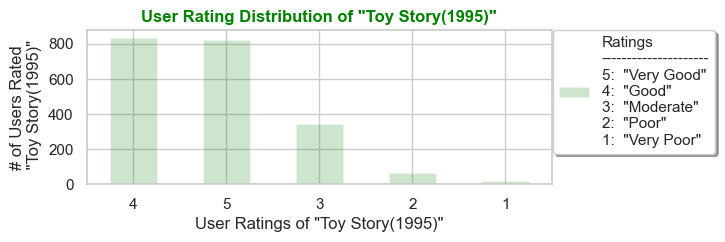

In [23]:
##############################################################################################################
# plot the graph of the ratings received by the movie Toy Story
##############################################################################################################
Master_Data_toystory.Rating.value_counts().plot.bar(figsize=(6,2), color='green', alpha=0.2, \
                                            label=('Ratings''\n' 
                                                   '---------------------' '\n'
                                                   '5:  "Very Good"''\n'
                                                   '4:  "Good"''\n'
                                                   '3:  "Moderate"''\n'
                                                   '2:  "Poor"''\n'
                                                   '1:  "Very Poor"'))


plt.title('User Rating Distribution of "Toy Story(1995)"',color='green',fontweight='bold')
plt.xlabel('User Ratings of "Toy Story(1995)"')
plt.ylabel('# of Users Rated\n "Toy Story(1995)"')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(0.868, 0.55, 0.5, 0.5),shadow=True)
plt.show()

# Toy Story movie received 4 and 5 ratings by more than 1600 users 
# and less than 10 users rated as 1

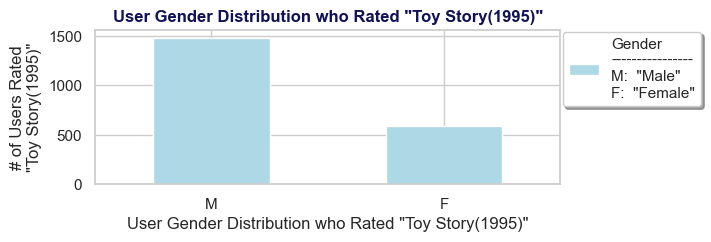

In [24]:
##############################################################################################################
# plot the graph of the gender distribution of the users who rated the Toy Story movie
##############################################################################################################
Master_Data_toystory.Gender.value_counts().plot.bar(figsize=(6,2), color='lightblue',\
label=('Gender''\n' 
       '----------------' '\n'
       'M:  "Male"''\n'
       'F:  "Female"'))
plt.title('User Gender Distribution who Rated "Toy Story(1995)"',color='#111155',fontweight='bold')
plt.xlabel('User Gender Distribution who Rated "Toy Story(1995)"')
plt.ylabel('# of Users Rated\n"Toy Story(1995)"')
plt.legend(bbox_to_anchor=(0.82, 0.54, 0.5, 0.5),shadow=True)
plt.xticks(rotation=0)
plt.show()

# More than 1450 male users provided ratings for Toy Story movie
# while only around 600 female users 

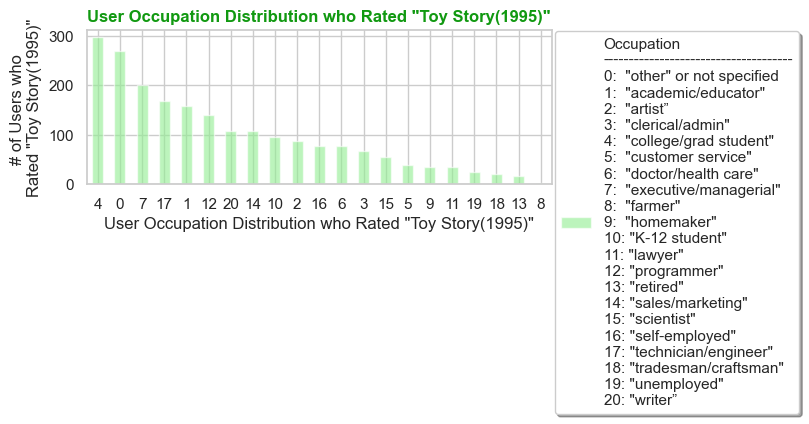

In [26]:
##############################################################################################################
# plot the graph of the occupation of the users who rated the Toy Story movie
##############################################################################################################
Master_Data_toystory.Occupation.value_counts().plot.bar(figsize=(6,2), alpha=.6,color='lightgreen',\
label=('Occupation''\n' 
       '-------------------------------------' '\n'
    '0:  "other" or not specified''\n'
    '1:  "academic/educator"''\n'
    '2:  "artist”''\n'
    '3:  "clerical/admin"''\n'
    '4:  "college/grad student"''\n'
    '5:  "customer service"''\n'
    '6:  "doctor/health care"''\n'
    '7:  "executive/managerial"''\n'
    '8:  "farmer"''\n'
    '9:  "homemaker"''\n'
    '10: "K-12 student"''\n'
    '11: "lawyer"''\n'
    '12: "programmer"''\n'
    '13: "retired"''\n'
    '14: "sales/marketing"''\n'
    '15: "scientist"''\n'
    '16: "self-employed"''\n'
    '17: "technician/engineer"''\n'
    '18: "tradesman/craftsman"''\n'
    '19: "unemployed"''\n'
    '20: "writer”'))
plt.title('User Occupation Distribution who Rated "Toy Story(1995)"',color='#119911',fontweight='bold')
plt.xlabel('User Occupation Distribution who Rated "Toy Story(1995)"')
plt.ylabel('# of Users who \nRated "Toy Story(1995)"')
plt.legend(bbox_to_anchor=(0.99, 0.54, 0.5, 0.5),shadow=True)
plt.xticks(rotation=0)
plt.show()

# College/grad students provided most ratings while farmers
# and retired provided least ratings for Toy Story movie

In [27]:
##############################################################################################################
# create a subset of the master data file to extract the top rated movies
##############################################################################################################
Master_Data_top_rate = Master_Data.drop(['UserID','Gender','Age','Occupation','Genres'],axis=1)


In [28]:
##############################################################################################################
# extract only the movieID and ratings fields to groupby, unstack,fillna and later sort and plot 
##############################################################################################################
Master_Data_top_rate = Master_Data_top_rate.groupby(['MovieID','Rating']).size().unstack().fillna(0)

In [29]:
##############################################################################################################
# sort the above created file by the ratings order begining with 5 then 4, 3 , 2 and 1
##############################################################################################################
Master_Data_top_rate=Master_Data_top_rate.sort_values(by=[5,4,3,2,1],ascending=False)

In [30]:
##############################################################################################################
# look at the top 5 movies that have the top ratings
##############################################################################################################
Master_Data_top_rate.head(5)

Rating,1,2,3,4,5
MovieID,,,,,
2858,83.0,134.0,358.0,890.0,1963.0
260,19.0,62.0,288.0,796.0,1826.0
1198,4.0,37.0,213.0,760.0,1500.0
1196,22.0,83.0,375.0,1027.0,1483.0
527,19.0,28.0,186.0,596.0,1475.0


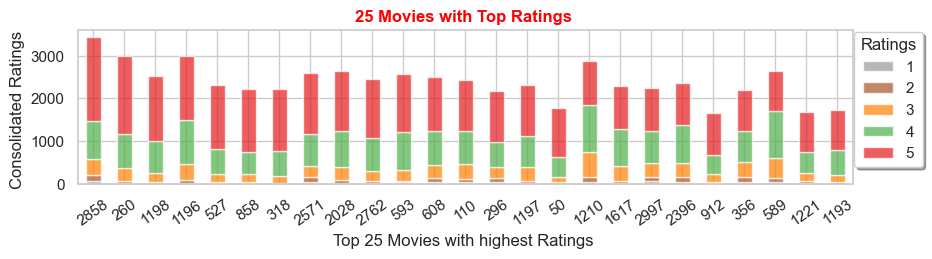

In [35]:
##############################################################################################################
# plot the graph of the top 25 movies with highest ratings
##############################################################################################################

Master_Data_top_rate.head(25).plot(kind='bar',figsize=(10,2),cmap='Set1_r',\
                                   stacked=True,alpha=0.7)
plt.xlabel('Top 25 Movies with highest Ratings ')
plt.ylabel('Consolidated Ratings ')
plt.title('25 Movies with Top Ratings ',fontweight='bold',color='red')
plt.legend(title='Ratings',bbox_to_anchor=(0.6, 0.54, 0.5, 0.5),shadow=True)
plt.xticks(rotation=35)
plt.show()

# American Beauty (1999), 
# Star Wars: Episode IV - A New Hope (1977), 
# Raiders of the Lost Ark (1981), 
# Star Wars: Episode V - The Empire Strikes Back..,
# Schindler's List (1993)
# above are the 5 top rated movies/dramas
# the plot shows the top 25 consolidated movie ratings

In [36]:
##############################################################################################################
# now extract the details of a particular userid - 2696
##############################################################################################################
Master_Data_userid_2696 = Master_Data[Master_Data['UserID']==2696]

In [37]:
##############################################################################################################
# drop the unwanted fields from the newly extracted file of userid 2696
##############################################################################################################
Master_Data_userid_2696 = Master_Data_userid_2696.drop(['UserID','Gender','Age','Occupation','Title','Genres'],axis=1)

In [38]:
##############################################################################################################
# look at the records of the file created for userid 2696
##############################################################################################################
Master_Data_userid_2696.head()

,MovieID,Rating,Timestamp,Zip-code
440667,1258,4,973308710,24210
440668,1270,2,973308676,24210
440669,1617,4,973308842,24210
440670,1625,4,973308842,24210
440671,1644,2,973308920,24210


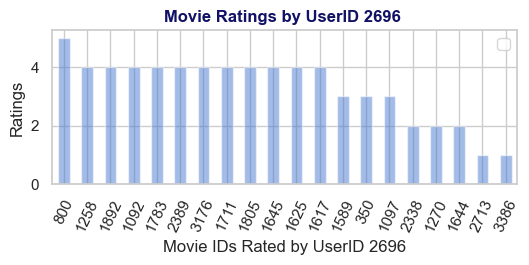

In [39]:
##############################################################################################################
# plot the graph of the ratings given by userid 2696 for various movies
##############################################################################################################

Master_Data_userid_2696.sort_values(by='Rating',ascending=False).plot(alpha=.5,kind='bar',\
                                                                      x='MovieID',y='Rating',figsize=(6,2))
plt.ylabel('Ratings')
plt.xlabel('Movie IDs Rated by UserID 2696')
plt.title('Movie Ratings by UserID 2696 ',color='#111166',fontweight='bold')
plt.xticks(rotation=65)
plt.legend('')
plt.show()

# Above plot shows us the ratings provide by User 2696.
# 1 movie rated as 5
# 11 movies as 4
# 3 movies as 3
# 3 movies as 2
# and 2 movies as 1

In [40]:
##############################################################################################################
# create a subset of movies file with movieID and Genres fields
##############################################################################################################
Master_Data_genre = movies[['MovieID','Genres']]

In [41]:
##############################################################################################################
# split the genres field into different columns for later processing
##############################################################################################################
Master_Data_genre_split=Master_Data_genre.Genres.str.split(expand=True,pat='|')

In [42]:
##############################################################################################################
# look at the top 5 records of the above created file
##############################################################################################################
Master_Data_genre_split.head()

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None


In [43]:
##############################################################################################################
# store all unique values from the newly created columns and store them in different variables
##############################################################################################################
Master0=list(Master_Data_genre_split.iloc[:,0].unique())
Master1=list(Master_Data_genre_split.iloc[:,1].unique())
Master2=list(Master_Data_genre_split.iloc[:,2].unique())
Master3=list(Master_Data_genre_split.iloc[:,3].unique())
Master4=list(Master_Data_genre_split.iloc[:,4].unique())
Master5=list(Master_Data_genre_split.iloc[:,5].unique())

In [44]:
##############################################################################################################
# consolidate the above unique value files into one file to remove duplicates
##############################################################################################################
Master0.extend(Master1)
Master0.extend(Master2)
Master0.extend(Master3)
Master0.extend(Master4)
Master0.extend(Master5)

In [45]:
##############################################################################################################
# create a set of the above file to remove the duplicates
##############################################################################################################
MasterSet = set(Master0)

In [46]:
##############################################################################################################
# remove the 'None' value from the above created set
##############################################################################################################
MasterSet.remove(None)

In [47]:
##############################################################################################################
# look at the masterSet file to make sure it's fine
##############################################################################################################
MasterSet

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Above are the 18 categories/genres under which movies
# are classified - a movie can be classified into more than
# one category

In [48]:
##############################################################################################################
# merge the movies file and the above created genre file
##############################################################################################################
moviesFull = pd.merge(movies,Master_Data_genre_split,left_index=True,right_index=True)

In [49]:
##############################################################################################################
# look at the top five records of the newly created file
##############################################################################################################
moviesFull.head()

,MovieID,Title,Genres,0,1,2,3,4,5
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None


In [50]:
##############################################################################################################
# define a function to use in one-hot-encoing. Do the one-hot-encoding of new columns using lambda function
##############################################################################################################
def  def_NewField(row,str1) :   
    
    if ((row.iloc[3]==str1) | (row.iloc[4]==str1) | (row.iloc[5]==str1) | (row.iloc[6]==str1) | \
        (row.iloc[7]==str1) | (row.iloc[8]==str1)):
        return 1
    else:
        return 0


moviesFull['Action']    = moviesFull.apply(lambda  row: def_NewField(row,'Action'),axis=1)
moviesFull['Adventure'] = moviesFull.apply(lambda  row: def_NewField(row,'Adventure'),axis=1)
moviesFull['Animation'] = moviesFull.apply(lambda  row: def_NewField(row,'Animation'),axis=1)
moviesFull['Childrens'] = moviesFull.apply(lambda  row: def_NewField(row,"Children's"),axis=1)
moviesFull['Comedy']    = moviesFull.apply(lambda  row: def_NewField(row,'Comedy'),axis=1)
moviesFull['Crime']     = moviesFull.apply(lambda  row: def_NewField(row,'Crime'),axis=1)
moviesFull['Documentary'] = moviesFull.apply(lambda  row: def_NewField(row,'Documentary'),axis=1)
moviesFull['Drama']     = moviesFull.apply(lambda  row: def_NewField(row,'Drama'),axis=1)
moviesFull['Fantasy']   = moviesFull.apply(lambda  row: def_NewField(row,'Fantasy'),axis=1)
moviesFull['Film-Noir'] = moviesFull.apply(lambda  row: def_NewField(row,'Film-Noir'),axis=1)
moviesFull['Horror']    = moviesFull.apply(lambda  row: def_NewField(row,'Horror'),axis=1)
moviesFull['Musical']   = moviesFull.apply(lambda  row: def_NewField(row,'Musical'),axis=1)
moviesFull['Mystery']   = moviesFull.apply(lambda  row: def_NewField(row,'Mystery'),axis=1)
moviesFull['Romance']   = moviesFull.apply(lambda  row: def_NewField(row,'Romance'),axis=1)
moviesFull['Sci-Fi']    = moviesFull.apply(lambda  row: def_NewField(row,'Sci-Fi'),axis=1)
moviesFull['Thriller']  = moviesFull.apply(lambda  row: def_NewField(row,'Thriller'),axis=1)
moviesFull['War']       = moviesFull.apply(lambda  row: def_NewField(row,'War'),axis=1)
moviesFull['Western']   = moviesFull.apply(lambda  row: def_NewField(row,'Western'),axis=1)

In [51]:
##############################################################################################################
# look at the top 5 records of the newly created file after one-hot-encoding
##############################################################################################################
moviesFull.head()

,MovieID,Title,Genres,0,1,2,3,4,5,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,None,None,None,None,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
##############################################################################################################
# check the structure to make sure all columns are created and populated with no null values
##############################################################################################################
moviesFull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MovieID      3883 non-null   int64 
 1   Title        3883 non-null   object
 2   Genres       3883 non-null   object
 3   0            3883 non-null   object
 4   1            1858 non-null   object
 5   2            536 non-null    object
 6   3            115 non-null    object
 7   4            15 non-null     object
 8   5            1 non-null      object
 9   Action       3883 non-null   int64 
 10  Adventure    3883 non-null   int64 
 11  Animation    3883 non-null   int64 
 12  Childrens    3883 non-null   int64 
 13  Comedy       3883 non-null   int64 
 14  Crime        3883 non-null   int64 
 15  Documentary  3883 non-null   int64 
 16  Drama        3883 non-null   int64 
 17  Fantasy      3883 non-null   int64 
 18  Film-Noir    3883 non-null   int64 
 19  Horror       3883 non-null 

In [53]:
##############################################################################################################
# drop unwanted fields from the above created file
##############################################################################################################
moviesFull = moviesFull.iloc[:,([0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26])]

In [54]:
##############################################################################################################
# look at the top 5 records after above fields deletion
##############################################################################################################
moviesFull.head()

,MovieID,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
##############################################################################################################
# extract only numeric fields from the master file and store in another field, do o-h-e of Gender and delete
##############################################################################################################
Master_Data_num = Master_Data.iloc[:,([0,1,2,3,4,5,6,7])]
Master_Data_num['Gender_num']=[1 if status=='M' else 0 for status in Master_Data_num['Gender']]
Master_Data_num = Master_Data_num.drop(['Gender'],axis=1)
Master_Data_num.head()

,UserID,MovieID,Rating,Timestamp,Age,Occupation,Zip-code,Gender_num
0,1,1193,5,978300760,1,10,48067,0
1,1,661,3,978302109,1,10,48067,0
2,1,914,3,978301968,1,10,48067,0
3,1,3408,4,978300275,1,10,48067,0
4,1,2355,5,978824291,1,10,48067,0


In [56]:
##############################################################################################################
# merge the numeric master data file and one-hot-encoded file to create a master file for Machine Learning
##############################################################################################################
Movies_model = pd.merge(Master_Data_num,moviesFull,on='MovieID')

In [57]:
##############################################################################################################
# look at the top 5 records of the newly created file
##############################################################################################################
Movies_model.head()

,UserID,MovieID,Rating,Timestamp,Age,Occupation,Zip-code,Gender_num,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,1,10,48067,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,978298413,56,16,70072,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,978220179,25,12,32793,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,978199279,25,7,22903,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,978158471,50,1,95350,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
##############################################################################################################
# look at the info of the newly created file to make sure everything is ok 
##############################################################################################################
Movies_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 26 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserID       1000209 non-null  int64 
 1   MovieID      1000209 non-null  int64 
 2   Rating       1000209 non-null  int64 
 3   Timestamp    1000209 non-null  int64 
 4   Age          1000209 non-null  int64 
 5   Occupation   1000209 non-null  int64 
 6   Zip-code     1000209 non-null  object
 7   Gender_num   1000209 non-null  int64 
 8   Action       1000209 non-null  int64 
 9   Adventure    1000209 non-null  int64 
 10  Animation    1000209 non-null  int64 
 11  Childrens    1000209 non-null  int64 
 12  Comedy       1000209 non-null  int64 
 13  Crime        1000209 non-null  int64 
 14  Documentary  1000209 non-null  int64 
 15  Drama        1000209 non-null  int64 
 16  Fantasy      1000209 non-null  int64 
 17  Film-Noir    1000209 non-null  int64 
 18  Horror       1000209 n

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
Movies_model['Zip-code'] = le.fit_transform(Movies_model['Zip-code'])

In [61]:
Movies_model['Zip-code'].nunique()

3439

In [62]:
##############################################################################################################
# drop the Zip-code column from the file as the data is inconsistant and can not be used for Machine Learning 
##############################################################################################################
#Movies_model = Movies_model.drop(['Zip-code'],axis=1)

In [63]:
Movies_model.Rating.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

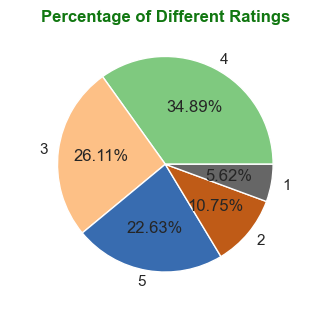

In [64]:
plt.figure(figsize=(6,3.5))
Movies_model.Rating.value_counts().plot(kind='pie',autopct='%.2f%%',cmap=plt.cm.Accent)
plt.title('Percentage of Different Ratings',color='#117711',fontweight='bold')
plt.ylabel(' ')
plt.show()

##  They are little imbalanced; let me balance them.

In [65]:
Movies1 = Movies_model[Movies_model.Rating==1]
Movies2 = Movies_model[Movies_model.Rating==2]
Movies3 = Movies_model[Movies_model.Rating==3]
Movies4 = Movies_model[Movies_model.Rating==4]
Movies5 = Movies_model[Movies_model.Rating==5]
Movies1.shape,Movies2.shape,Movies3.shape,Movies4.shape,Movies5.shape

((56174, 26), (107557, 26), (261197, 26), (348971, 26), (226310, 26))

In [66]:
Movies1 = Movies1.sample(frac=6.2123,replace=True,random_state=1)
Movies2 = Movies2.sample(frac=3.2445,replace=True,random_state=1)
Movies3 = Movies3.sample(frac=1.3360,replace=True,random_state=1)
Movies5 = Movies5.sample(frac=1.5420,replace=True,random_state=1)
Movies1.shape,Movies2.shape,Movies3.shape,Movies4.shape,Movies5.shape

((348970, 26), (348969, 26), (348959, 26), (348971, 26), (348970, 26))

In [67]:
Movies_model_bkp = Movies_model.copy()
Movies_model = pd.concat([Movies1,Movies2,Movies3,Movies4,Movies5],axis=0)
Movies_model.shape

(1744839, 26)

In [68]:
##############################################################################################################
# seperate the file with all columns except ratings in one file and ratings alone in another file
##############################################################################################################
Movies_X = Movies_model.iloc[:,3:]
Movies_Y = Movies_model.iloc[:,2]

In [69]:
##############################################################################################################
# look at the top 5 records of the above created file
##############################################################################################################
Movies_X.head()

,Timestamp,Age,Occupation,Zip-code,Gender_num,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
742622,974673855,25,12,405,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
416099,965958395,18,3,1661,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
213961,976062200,25,9,1292,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
729663,956776986,45,1,1289,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
949444,976736416,35,16,2203,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [70]:
##############################################################################################################
# look at the top 5 records of the above file
##############################################################################################################
Movies_Y.value_counts()

4    348971
1    348970
5    348970
2    348969
3    348959
Name: Rating, dtype: int64

In [71]:
##############################################################################################################
# import the libraries needed for building models for Machine learning
##############################################################################################################
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [72]:
##############################################################################################################
# split the above created files into 2 train, and 2 testfiles with 80/20 ratio
##############################################################################################################
xtrain,xtest,ytrain,ytest = train_test_split(Movies_X,Movies_Y,test_size=0.2,stratify=Movies_Y)

In [73]:
ytest.value_counts()

5    69794
1    69794
2    69794
4    69794
3    69792
Name: Rating, dtype: int64

In [74]:
##############################################################################################################
# Instantiate minmaxscaler for scaling the data  
##############################################################################################################
scaler = MinMaxScaler()

In [75]:
##############################################################################################################
# fit the train file and later transform
##############################################################################################################
scaler.fit(xtrain)

MinMaxScaler()

In [76]:
##############################################################################################################
# Transform the train data
##############################################################################################################
xtrain=scaler.transform(xtrain)


In [77]:
##############################################################################################################
# transform the test file( no fit)
##############################################################################################################
xtest=scaler.transform(xtest)

In [78]:
##############################################################################################################
# instantiate the Gaussian Navie Bayes model
##############################################################################################################
GNB = GaussianNB()

In [79]:
##############################################################################################################
# fit the Gaussian NB model using xtrain and ytrain file
##############################################################################################################
GNB.fit(xtrain,ytrain)

GaussianNB()

In [80]:
##############################################################################################################
# predict the test file using the above GNB model
##############################################################################################################
ypred = GNB.predict(xtest)

In [81]:
##############################################################################################################
# extract unique labels from the predicted Gaussian model
##############################################################################################################
np.unique(ypred)

array([1, 2, 3, 4, 5], dtype=int64)

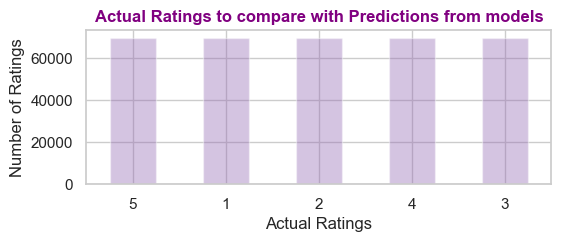

In [82]:
##############################################################################################################
# plot the bar chart of the know labels/Ratings for comparision with various predicted models
##############################################################################################################

ytest.value_counts().plot(kind='bar',figsize=(6,2), alpha=0.4, \
                               color='m')
plt.title('Actual Ratings to compare with Predictions from models',color='purple',fontweight='bold')
plt.xlabel('Actual Ratings')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.show()
                          

In [83]:
##############################################################################################################
# create a dataframe of the Gaussian Navie Bayes predicted ratings for plotting
##############################################################################################################
ypredGNB = pd.DataFrame(ypred)

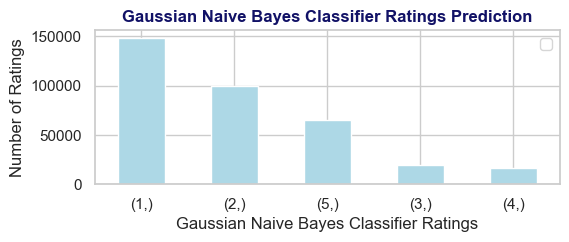

In [84]:
##############################################################################################################
# plot the Gaussian Navie Bayes predicted ratings for physical comparision
##############################################################################################################
ypredGNB.value_counts().plot(kind='bar',figsize=(6,2),\
                               color='lightblue')
plt.title('Gaussian Naive Bayes Classifier Ratings Prediction',color='#111166',fontweight='bold')
plt.xlabel('Gaussian Naive Bayes Classifier Ratings')
plt.ylabel('Number of Ratings')
plt.legend('')
plt.xticks(rotation=0)
plt.show()

In [85]:
##############################################################################################################
# create and print the confusion matrix of the Gaussian Navie Bayes model results
##############################################################################################################
cm = confusion_matrix(ytest,ypred)
print(cm)

[[39255 17206  2875  1710  8748]
 [33122 20347  3809  2328 10188]
 [28868 21422  4405  3144 11953]
 [25259 21047  4516  4104 14868]
 [22214 19413  4097  4610 19460]]


In [86]:
##############################################################################################################
# print the classification report of the Gaussian Navie bayes model results
##############################################################################################################
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.26      0.56      0.36     69794
           2       0.20      0.29      0.24     69794
           3       0.22      0.06      0.10     69792
           4       0.26      0.06      0.10     69794
           5       0.30      0.28      0.29     69794

    accuracy                           0.25    348968
   macro avg       0.25      0.25      0.22    348968
weighted avg       0.25      0.25      0.22    348968



# Accuracy of the Gaussian Navie bayes model is not good, just 25%

In [87]:
##############################################################################################################
# import the Stochastic Gradient Descent Classifier
##############################################################################################################
from sklearn.linear_model import SGDClassifier

In [88]:
##############################################################################################################
# instantiate the Stochastic Gradient Descent Classifier
##############################################################################################################
SGD = SGDClassifier()

In [89]:
##############################################################################################################
# fit the Stochastic Gradient Descent Classifier on train datasets
##############################################################################################################
SGD.fit(xtrain,ytrain)

SGDClassifier()

In [90]:
##############################################################################################################
# predict the Stochastic Gradient Descent Classifier on test dataset
##############################################################################################################
ypredSGD = SGD.predict(xtest)

In [91]:
##############################################################################################################
# create and print the confusion matrix of Stochastic Gradient Descent Classifier results
##############################################################################################################
cm = confusion_matrix(ytest,ypredSGD)
print(cm)


[[43630  2879 14230  7820  1235]
 [39340  3336 17620  7996  1502]
 [35786  3344 19668  9193  1801]
 [32390  3007 21743 10225  2429]
 [30599  2721 22206 11221  3047]]


In [92]:
##############################################################################################################
# print the classification report of the Stochastic Gradient Descent Classifier
##############################################################################################################
labels = ['Ratings 1','Ratings 2','Ratings 3','Ratings 4','Ratings 5']
print(classification_report(ytest,ypredSGD,target_names=labels))

              precision    recall  f1-score   support

   Ratings 1       0.24      0.63      0.35     69794
   Ratings 2       0.22      0.05      0.08     69794
   Ratings 3       0.21      0.28      0.24     69792
   Ratings 4       0.22      0.15      0.18     69794
   Ratings 5       0.30      0.04      0.08     69794

    accuracy                           0.23    348968
   macro avg       0.24      0.23      0.18    348968
weighted avg       0.24      0.23      0.18    348968



# Accuracy of the Stochastic Gradient Descent Classifier is
# poor than Gaussian Navie bayes model

In [93]:
##############################################################################################################
# create a dataframe of the Stochastic Gradient Descent Classifier predicted ratings
##############################################################################################################
ypredSGDdf = pd.DataFrame(ypredSGD)

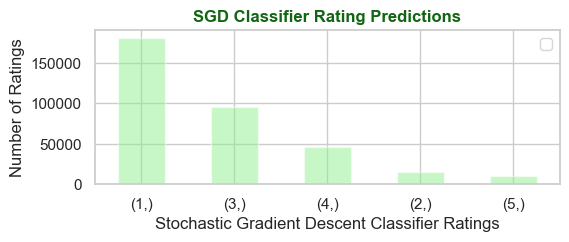

In [94]:
##############################################################################################################
# plot the Stochastic Gradient Descent Classifier predicted ratings
##############################################################################################################
ypredSGDdf.value_counts().plot(kind='bar',figsize=(6,2),\
                               color='lightgreen',alpha=.5)
plt.title('SGD Classifier Rating Predictions',color='#116611',fontweight='bold')
plt.xlabel('Stochastic Gradient Descent Classifier Ratings')
plt.ylabel('Number of Ratings')
plt.legend('')
plt.xticks(rotation=0)
plt.show()

In [95]:
##############################################################################################################
# import the DecisionTreeClassifier model
##############################################################################################################
from sklearn.tree import DecisionTreeClassifier

In [96]:
##############################################################################################################
# instantiate the DecisionTreeClassifier 
##############################################################################################################
DT = DecisionTreeClassifier(criterion='entropy')

In [97]:
##############################################################################################################
# fit the DecisionTreeClassifier on train datasets
##############################################################################################################
DT.fit(xtrain,ytrain)          


DecisionTreeClassifier(criterion='entropy')

In [98]:
##############################################################################################################
# predict the DecisionTreeClassifier on test dataset
##############################################################################################################
ypredDT = DT.predict(xtest)

In [99]:
##############################################################################################################
# create a dataframe of the DecisionTreeClassifier predicted ratings
##############################################################################################################
ypredDTdf = pd.DataFrame(ypredDT)

In [100]:
##############################################################################################################
# create and print the DecisionTreeClassifier confusion matrix 
##############################################################################################################
cmDT = confusion_matrix(ytest,ypredDT)
print(cmDT)

[[68773   646   193   112    70]
 [ 2126 63751  1865  1325   727]
 [ 2202  4787 50978  8004  3821]
 [ 3049  7095 15445 29209 14996]
 [ 1027  1866  4072  8830 53999]]


In [101]:
##############################################################################################################
# print the Classification report of the Decision Tree Classifier
##############################################################################################################
print(classification_report(ytest,ypredDT,target_names=labels))

              precision    recall  f1-score   support

   Ratings 1       0.89      0.99      0.94     69794
   Ratings 2       0.82      0.91      0.86     69794
   Ratings 3       0.70      0.73      0.72     69792
   Ratings 4       0.62      0.42      0.50     69794
   Ratings 5       0.73      0.77      0.75     69794

    accuracy                           0.76    348968
   macro avg       0.75      0.76      0.75    348968
weighted avg       0.75      0.76      0.75    348968



# Acuracy of Decision Tree Classifier is 76%, far better than 
# Stochastic Gradient Descent Classifier and 
# Gaussian Navie bayes models

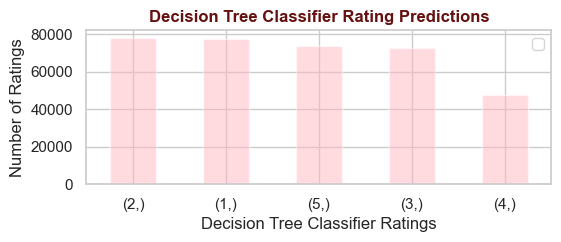

In [102]:
##############################################################################################################
# plot the predicted ratings of the Decision Tree Classifier
##############################################################################################################
ypredDTdf.value_counts().plot(kind='bar',figsize=(6,2),color='lightpink',alpha=.5)
plt.title('Decision Tree Classifier Rating Predictions',color='#661111',fontweight='bold')
plt.xlabel('Decision Tree Classifier Ratings')
plt.ylabel('Number of Ratings')
plt.legend('')
plt.xticks(rotation=0)
plt.show()

In [103]:
##############################################################################################################
# import the RandomForestClassifier
##############################################################################################################
from sklearn.ensemble import RandomForestClassifier

In [104]:
##############################################################################################################
# instantiate the RandomForestClassifier 
##############################################################################################################
RFC = RandomForestClassifier(n_estimators=25,criterion='entropy',)

In [105]:
##############################################################################################################
# fit the RandomForestClassifier on train datasets
##############################################################################################################
RFC.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [106]:
##############################################################################################################
# predict the RandomForestClassifier on test dataset
##############################################################################################################
ypredRFC = RFC.predict(xtest)

In [107]:
##############################################################################################################
# create a dataframe of the RandomForestClassifier predicted ratings
##############################################################################################################
ypredRFCdf = pd.DataFrame(ypredRFC)

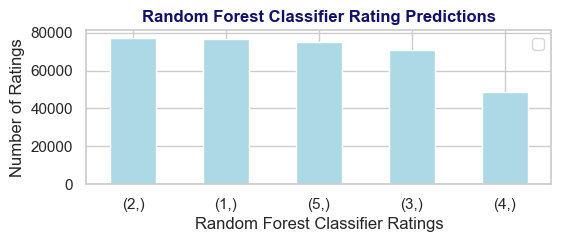

In [108]:
##############################################################################################################
# plot the predicted ratings of the RandomForestClassifier
##############################################################################################################
ypredRFCdf.value_counts().plot(kind='bar',figsize=(6,2),color='lightblue')
plt.title('Random Forest Classifier Rating Predictions',color='#111166',fontweight='bold')
plt.xlabel('Random Forest Classifier Ratings')
plt.ylabel('Number of Ratings')
plt.legend('')
plt.xticks(rotation=0)
plt.show()

In [109]:
##############################################################################################################
# create and print the confusion matrix of the RandomForestClassifier
##############################################################################################################
cmRFC = confusion_matrix(ytest,ypredRFC)
print(cmRFC)


[[68389   852   274   171   108]
 [ 2053 62992  2163  1678   908]
 [ 2213  4774 49792  8928  4085]
 [ 3069  6943 15017 29475 15290]
 [ 1018  1864  3716  8469 54727]]


In [110]:
##############################################################################################################
# print the classification report of the RandomForestClassifier
##############################################################################################################
print(classification_report(ytest,ypredRFC,target_names=labels))

              precision    recall  f1-score   support

   Ratings 1       0.89      0.98      0.93     69794
   Ratings 2       0.81      0.90      0.86     69794
   Ratings 3       0.70      0.71      0.71     69792
   Ratings 4       0.60      0.42      0.50     69794
   Ratings 5       0.73      0.78      0.76     69794

    accuracy                           0.76    348968
   macro avg       0.75      0.76      0.75    348968
weighted avg       0.75      0.76      0.75    348968



# Accuracy of Random Forest Classifier is as good as 
# Decision Tree Classifier 

# Both Random Forest Classifier and Decision Tree Classifier
# are best suited for ratings prediction with all binary features data like this

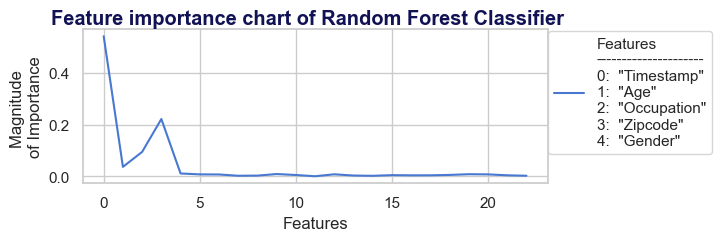

In [114]:
##############################################################################################################
# plot the feature importance data from RandomForestClassifier as a graph  
##############################################################################################################

plt.figure(figsize=(6,2))
plt.plot(RFC.feature_importances_,
        label=('Features''\n' 
                                                   '---------------------' '\n'
                                                   '0:  "Timestamp"''\n'
                                                   '1:  "Age"''\n'
                                                   '2:  "Occupation"''\n'
                                                   '3:  "Zipcode"''\n'
                                                   '4:  "Gender"'))
        
        
        
plt.suptitle('Feature importance chart of Random Forest Classifier',color='#111155',fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Magnitude \nof Importance')
plt.legend(bbox_to_anchor=(0.87, 0.54, 0.5, 0.5))
plt.show()



# Features 0,1,2 and 3 has the major impact on the ratings
# especially feature 0
# feature 0 is Timestamp - the time at which users watch movies
# feature 1 is Age groups of the people rating movies
# feature 2 is Occupation of the users rating movies
# feature 3 is Zipcode where users live 
# Other features are all having binary data, so they have no impact 
# on the ratings

# Neural Netwok Model

In [115]:
##############################################################################################################
# import the libraries for deep learning model building
##############################################################################################################
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import regularizers 

In [116]:
xtrain.shape

(1395871, 23)

In [117]:
##############################################################################################################
# build the deep learnig model and compile for loan data analysis 
##############################################################################################################
def Create_Model():
    model = Sequential()
    model.add(Input(shape=(23,)))
    
    model.add(Dense(230, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001)))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Dense(46, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001)))
    model.add(BatchNormalization())
    model.add(Dropout(.2))
    model.add(Dense(92, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l2(0.000001)))
    model.add(Dropout(.2))
    model.add(BatchNormalization())
   
    model.add(Flatten())
    model.add(Dense(10, activation=tf.nn.relu, kernel_regularizer = tf.keras.regularizers.l1(0.000001)))
    model.add(Dropout(.5))

    model.add(Dense(5, activation=tf.nn.softmax))
    return model

In [118]:
##############################################################################################################
# Instantiate the deep learnig model and compile for loan data analysis 
##############################################################################################################
model = Create_Model()

In [119]:
##############################################################################################################
# import callback and load model modules 
##############################################################################################################
import warnings
warnings.filterwarnings('ignore')
import tqdm 
import tensorflow_addons as tfa
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown('## <span style="color:red">'+string+'</span>'))
tqdm_callback = tfa.callbacks.TQDMProgressBar()
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.models import load_model 


In [120]:
##############################################################################################################
# define check points  
##############################################################################################################
FILEPATHA="./Weights/weights_MovieLens_Data_Analysis_NewDlArch_v23.hdf5"
checkpoint = ModelCheckpoint(FILEPATHA, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
RLROP_PAT = 15
DECAY_DROP = 0.95

Reduce_lr_on_plat=ReduceLROnPlateau(monitor='val_accuracy',mode='max',patience=RLROP_PAT,factor=DECAY_DROP,\
                                    min_lr=1e-29,verbose=2)

callbacks = [tqdm_callback, checkpoint, Reduce_lr_on_plat]   


In [121]:
##############################################################################################################
# load the model for prediction and also print the model summary of the loaded model 
##############################################################################################################
#model = load_model(FILEPATHA)
model.load_weights(FILEPATHA)
lr=1e-4
optimizer  = tf.keras.optimizers.Adam(lr=lr, beta_1=0.9)
model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy',metrics = ['accuracy']) 

model.summary()                                                                                                    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 230)               5520      
_________________________________________________________________
batch_normalization (BatchNo (None, 230)               920       
_________________________________________________________________
dropout (Dropout)            (None, 230)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                10626     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46)                184       
_________________________________________________________________
dropout_1 (Dropout)          (None, 46)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 92)                4

In [122]:
##############################################################################################################
# modify the target data to suite sparse categorical entropy loss/accuracy calculation
##############################################################################################################
ytest1 = ytest.apply(lambda x: x-1 )
ytrain1 = ytrain.apply(lambda x: x-1 )

In [290]:
##############################################################################################################
# fit the built model and run it for 1000 epochs
##############################################################################################################
history = model.fit(xtrain,ytrain1, validation_data=(xtest,ytest1),     
                    batch_size=2240, epochs=10, verbose=0,callbacks=callbacks)

Training:   0%|                                                                                0/10 ETA: ?s,  …

Epoch 1/10


0/624                                                                                                        E…


Epoch 00001: val_accuracy did not improve from 0.30517
Epoch 2/10


0/624                                                                                                        E…


Epoch 00002: val_accuracy did not improve from 0.30517
Epoch 3/10


0/624                                                                                                        E…


Epoch 00003: val_accuracy did not improve from 0.30517
Epoch 4/10


0/624                                                                                                        E…


Epoch 00004: val_accuracy did not improve from 0.30517
Epoch 5/10


0/624                                                                                                        E…


Epoch 00005: val_accuracy did not improve from 0.30517
Epoch 6/10


0/624                                                                                                        E…


Epoch 00006: val_accuracy did not improve from 0.30517
Epoch 7/10


0/624                                                                                                        E…


Epoch 00007: val_accuracy did not improve from 0.30517
Epoch 8/10


0/624                                                                                                        E…


Epoch 00008: val_accuracy did not improve from 0.30517
Epoch 9/10


0/624                                                                                                        E…


Epoch 00009: val_accuracy did not improve from 0.30517
Epoch 10/10


0/624                                                                                                        E…


Epoch 00010: val_accuracy did not improve from 0.30517


In [123]:
##############################################################################################################
# extract the variables for accuracy and loss reporting
##############################################################################################################
train_loss, train_acc = model.evaluate(xtrain,ytrain1, verbose=0,callbacks=[tqdm_callback])
test_loss, test_acc = model.evaluate(xtest,ytest1, verbose=0,callbacks=[tqdm_callback])
print('Train Accu: %.3f, Test Accu: %.3f' % (train_acc, test_acc))
print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

0/43621                                                                                            ETA: ?s - E…

0/10906                                                                                            ETA: ?s - E…

Train Accu: 0.307, Test Accu: 0.307
Train Loss: 1.524, Test Loss: 1.524


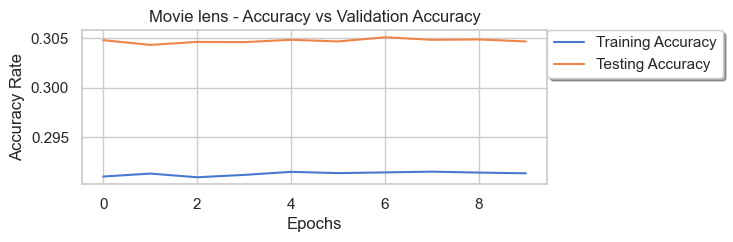

In [293]:
##############################################################################################################
# create training and testing accuracy chart
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Movie lens - Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Rate')
plt.legend(bbox_to_anchor=(0.895, 0.55, 0.5, 0.5),shadow=True)
plt.grid(True)
plt.show()

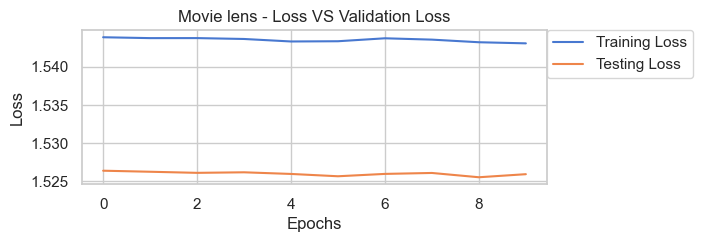

In [294]:
##############################################################################################################
# create the trainig and testing loss chart
##############################################################################################################
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Movie lens - Loss VS Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(0.83, 0.55, 0.5, 0.5))

plt.show()

In [124]:
##############################################################################################################
# predict and extract the count of rows with probability more than .5 as the loan default indicator
##############################################################################################################
pred=model.predict(xtest)
predClass = np.argmax(pred,axis=1)


In [125]:
##############################################################################################################
# extract the classes predicted by the model
##############################################################################################################
pred1=model.predict_classes(xtest)


<Figure size 600x250 with 0 Axes>

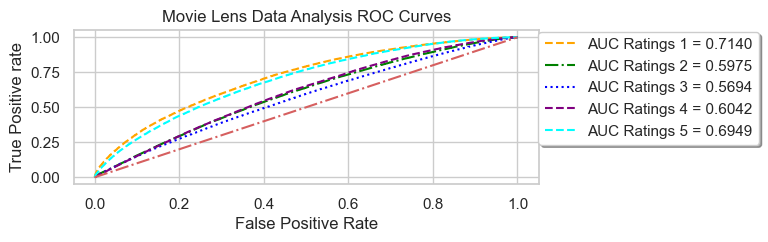

In [126]:
##############################################################################################################
# import rquired library and create the roc curve 
##############################################################################################################
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
plt.figure(figsize=(6,2.5))

fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
n_class = 5  
pred_prob = model.predict_proba(xtest)

i = 0 
while i < n_class:
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest1, pred_prob[:,i], pos_label=i)
    i = i + 1

i = 0 
while i < n_class:
    roc_auc[i] = auc(fpr[i], tpr[i])
    i = i + 1
#################################################################################################
# plotting    
#################################################################################################

plt.figure(figsize=(6,2))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='AUC Ratings 1 = %0.4f'% roc_auc[0])
plt.plot(fpr[1], tpr[1], linestyle='-.',color='green',  label='AUC Ratings 2 = %0.4f'% roc_auc[1])
plt.plot(fpr[2], tpr[2], linestyle=':', color='blue',   label='AUC Ratings 3 = %0.4f'% roc_auc[2])
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='AUC Ratings 4 = %0.4f'% roc_auc[3])
plt.plot(fpr[4], tpr[4], linestyle='--',color='cyan',   label='AUC Ratings 5 = %0.4f'% roc_auc[4])
plt.plot([0,1],[0,1],'r-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.title('Movie Lens Data Analysis ROC Curves')
plt.legend(bbox_to_anchor=(0.99, 0.54, 0.5, 0.5),shadow=True)
plt.show()



Confusion Matrix of Movie Lens Ratings
[[43831  5683  3428  2892 13960]
 [32121  7751  5955  5205 18762]
 [24192  7354  6739  6927 24580]
 [18770  5598  6040  7244 32142]
 [15087  3601  3942  5648 41516]]


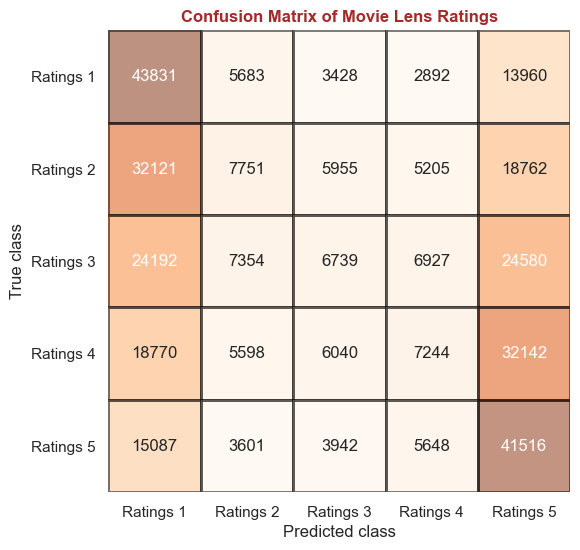

In [127]:
##############################################################################################################
# create the confusion martrix of predicted and actual values for comparision.
##############################################################################################################

from sklearn.metrics import confusion_matrix, classification_report
LABELS = ['Ratings 1','Ratings 2','Ratings 3','Ratings 4','Ratings 5']
sns.set(style='whitegrid', palette='muted', font_scale=1.0)
conf_matrix = confusion_matrix(ytest1, pred1)
print('Confusion Matrix of Movie Lens Ratings' )
print(conf_matrix)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,linewidths=2,linecolor='black',square=True,cbar=False,alpha=.5,
            annot=True,robust=True, fmt="d",cmap=plt.cm.Oranges);

plt.title("Confusion Matrix of Movie Lens Ratings",color='brown',fontweight='bold')
plt.yticks(rotation=0)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [128]:
##############################################################################################################
# create the classification report of the model output
##############################################################################################################
print(classification_report(ytest1, pred1,target_names=LABELS))

              precision    recall  f1-score   support

   Ratings 1       0.33      0.63      0.43     69794
   Ratings 2       0.26      0.11      0.16     69794
   Ratings 3       0.26      0.10      0.14     69792
   Ratings 4       0.26      0.10      0.15     69794
   Ratings 5       0.32      0.59      0.41     69794

    accuracy                           0.31    348968
   macro avg       0.28      0.31      0.26    348968
weighted avg       0.28      0.31      0.26    348968



# Neural Network Model too couldn't perform well with this data.

# Only couple of features have variation, other features are all binary and not enough to build a good predictable model. However, tree based models such as Decision Tree and Random Forest perform well even with binary data.

# Below chart shows us one more time how important the features are.

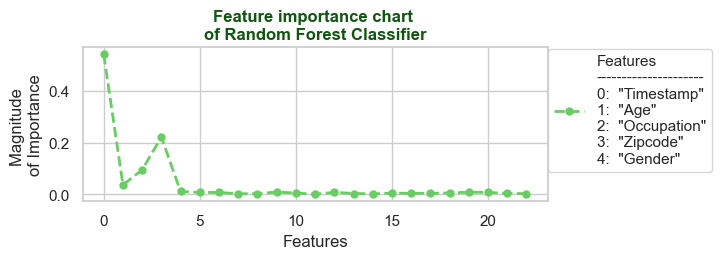

In [130]:
##############################################################################################################
# plot the feature importance data from RandomForestClassifier as a graph  
##############################################################################################################

plt.figure(figsize=(6,2))
plt.plot(RFC.feature_importances_,'go--',label=('Features''\n' 
                                                   '---------------------' '\n'
                                                   '0:  "Timestamp"''\n'
                                                   '1:  "Age"''\n'
                                                   '2:  "Occupation"''\n'
                                                   '3:  "Zipcode"''\n'
                                                   '4:  "Gender"'), linewidth=2, markersize=5)
plt.title('Feature importance chart \nof Random Forest Classifier',color='#115511',fontweight='bold')
plt.xlabel('Features')
plt.ylabel('Magnitude \nof Importance')
plt.legend(bbox_to_anchor=(0.87, 0.54, 0.5, 0.5))
plt.show()



In [131]:
##############################################################################################################
# predict the Neural Network Classifier on test dataset
##############################################################################################################
ypredDNN = model.predict_classes(xtest)

In [132]:
##############################################################################################################
# create a dataframe of the Neural Network Classifier predicted ratings
##############################################################################################################
ypredDNNdf = pd.DataFrame(ypredDNN)

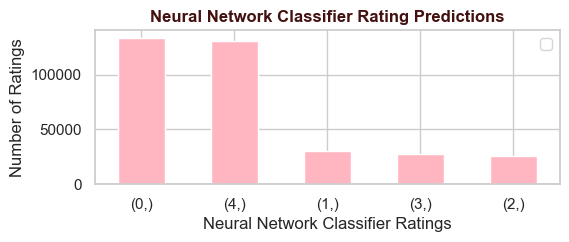

In [133]:
##############################################################################################################
# plot the predicted ratings of the Neural Network Classifier
##############################################################################################################
ypredDNNdf.value_counts().plot(kind='bar',figsize=(6,2),color='lightpink')
plt.title('Neural Network Classifier Rating Predictions',color='#441111',fontweight='bold')
plt.xlabel('Neural Network Classifier Ratings')
plt.ylabel('Number of Ratings')
plt.legend('')
plt.xticks(rotation=0)
plt.show()